In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 
from sasmodels.direct_model import DirectModel
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

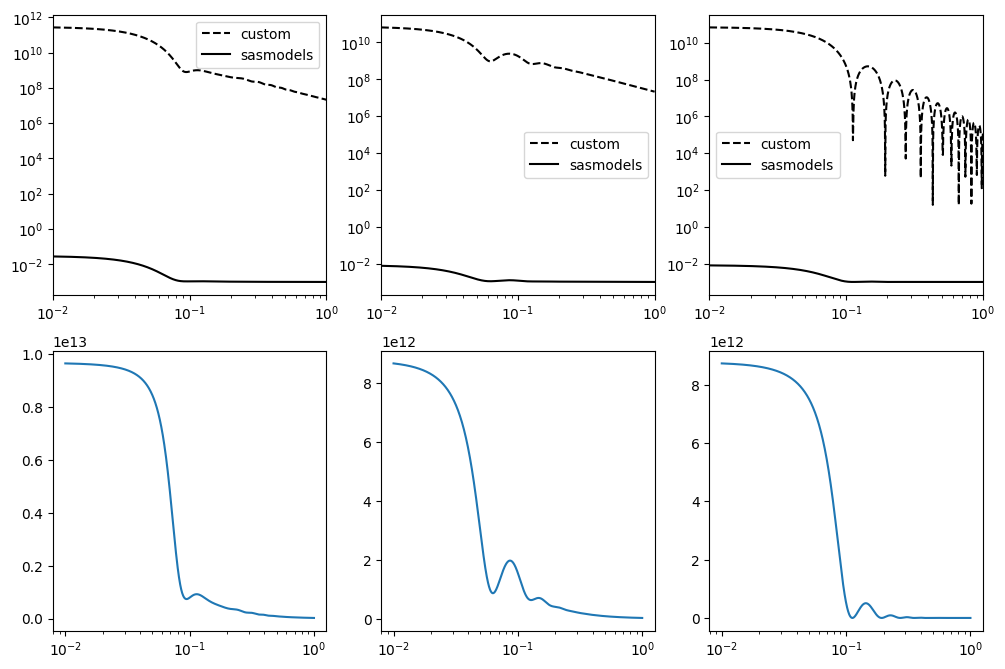

In [8]:
fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
# contrasts in the order of solvent, core, corona
contrasts = [[1,2,2], # homogenous
[1,1,2], # corona/shell
[1,2,1] # core
] 
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    params_custom = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    model_custom = load_model("../models/spherical_micelle.py")
    q = np.logspace(-2, 0, 1001)
    kernel_custom = model_custom.make_kernel([q])
    Iq_custom = call_kernel(kernel_custom, params_custom)
    axs[0,i].loglog(q, Iq_custom, ls='--', color='k', label="custom")
    
    model_sasmodels = load_model("polymer_micelle")
    kernel_sasmodels = model_sasmodels.make_kernel([q])
    params_sasmodels = {
        'ndensity' : 1.0,
        'v_core' : 4000.0,    
        'v_corona' : 4000.0,
        'sld_solvent' : rho_solv,
        'sld_core' : rho_s,
        'sld_corona' : rho_c,
        'radius_core': 40.0,
        'rg': 10.0,
        'd_penetration':1.0,
        'n_aggreg' : 67.0,
        }
    Iq_sasmodels = call_kernel(kernel_sasmodels, params_sasmodels)
    axs[0,i].loglog(q, Iq_sasmodels, color='k', label="sasmodels")

    axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].legend()

    axs[1,i].plot(q, Iq_custom/Iq_sasmodels)
    axs[1,i].set_xscale('log')
plt.show()

## Issues with sasmodels polymer micelles
1. The units don't quite match : unless ndensity is defined in cm-3 instead of cm3 as the documentation says, the intensity is not in cm-1

2. from A^2 to cm^2, the conversion should be 10^-16 not 10^-13 as coded in the model